# ParSplice System Health

One tool to make sure the system is healthy is the `times.out` file produced by ParSplice. The relationship between wall clock time and trajectory duration should be linear because it means the system is keeping up with the simulation load and is mirroring real time. According to Danny:

> "In an ideal case, the trajectory length would proportional to the wall-clock time. Of course, seeing a linear trend alone does not tell you that you are running at the optimal simulation rate  (given by the slope), but usually a nice straight line means you are."

In [1]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

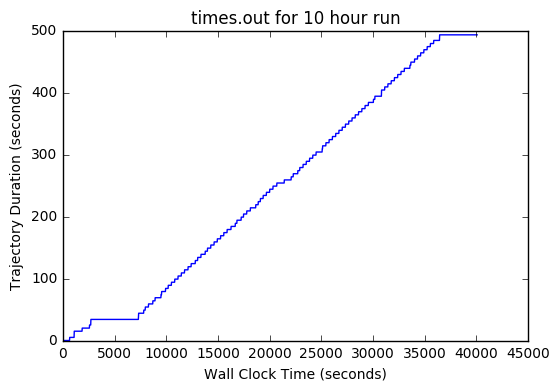

In [2]:
df = pd.read_csv("../results-10hrs/times.out",
                 delimiter=" ",
                 index_col=False,
                 names=["wc", "traj"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df["wc"], df["traj"])
ax.set_xlabel("Wall Clock Time (seconds)")
ax.set_ylabel("Trajectory Duration (seconds)")
ax.set_title("times.out for 10 hour run")

## Simulation Stalls

Is this run "healthy"? I see problems at 5000 seconds and 35000 seconds but the system recovers. Danny said:

> "If you zoom on he areas where the run stalled, do you get points every ~10s in the file, or does it jump discretely around these plateaus? Jumps would be bad, and might be related to the db sync issues (they are not the only possible causes, but they are the ones giving me trouble now)."

Zooming in, we see that we lose some samples, as there are 1000 second of stalls. I forgot to capture the DB activity, since it seems the LevelDB connector does not log DB activity like BerkeleyDB. We want examine these problem areas in future, although waiting 83 minutes for the first stall is time consuming. We can turn the temperature up to make the system "unhealthier".

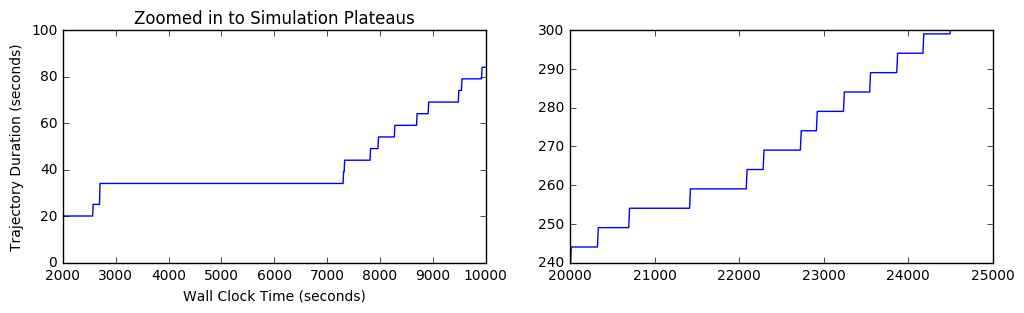

In [3]:
fig = plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].plot(df["wc"], df["traj"])
ax[0].set_xlim(2000, 10000)
ax[0].set_ylim(0, 100)
ax[0].set_xlabel("Wall Clock Time (seconds)")
ax[0].set_ylabel("Trajectory Duration (seconds)")
ax[0].set_title("Zoomed in to Simulation Plateaus")

ax[1].plot(df["wc"], df["traj"])
ax[1].set_xlim(20000, 25000)
ax[1].set_ylim(240, 300)
ax[0].set_xlabel("Wall Clock Time (seconds)")
ax[0].set_ylabel("Trajectory Duration (seconds)")
ax[0].set_title("Zoomed in to Simulation Plateaus")